<a href="https://colab.research.google.com/github/6hAkunAmAtAtA9/Neural_pathway/blob/main/2_Number_sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

В этой задаче я буду тренировать нейросети определять закономерности в числа. Нейросети на вход подается три числа; цель - определить три закономерности в числах (рост, уменьшение, равенство двух чисел) либо отсутствие закономерностей.

In [7]:
# Здесь я создал функцию для генерации данных
def list_generation(list_size=100):
  x_train = np.around(np.random.random(size=(list_size, 3)), decimals=1)
  y_train, y_labels = [], []

  for elem in x_train:
    if elem[0] < elem[1] < elem[2]: # GROW
      y_train.append([1, 0, 0, 0])
      y_labels.append('GROW')
    elif elem[0] > elem[1] > elem[2]: # REDUCE
      y_train.append([0, 1, 0, 0])
      y_labels.append('REDUCE')
    elif elem[0] == elem[1] or elem[1] == elem[2] or elem[0] == elem[2]: # EQUAL
      y_train.append([0, 0, 1, 0])
      y_labels.append('EQUAL')
    else:
      y_train.append([0, 0, 0, 1])
      y_labels.append('NOTHING')
  y_train = np.array(y_train); y_labels = np.array(y_labels)
  return x_train, y_train, y_labels

In [9]:
x_train, y_train, y_labels = list_generation(500)
x_test, y_test, y__test_labels = list_generation(20)

In [5]:
hidden_size = 10
weights_i_h = np.random.random(size=(hidden_size, len(x_train[0]))) - 0.5
weights_h_o = np.random.random(size=(len(y_test[0]), hidden_size)) - 0.5

In [6]:
alpha = 0.0001
iterations = 1000
total_err = []
flag = True

for iteration in range(iterations):
  error = 0
  for id in range(len(x_train)):
    input = np.reshape(x_train[id], (len(x_train[id]), 1))
    layer_1 = np.dot(weights_i_h, input) 
    output = np.dot(weights_h_o, layer_1) 
    error += np.sum((np.reshape(y_train[id], (len(y_train[id]), 1)) - output) ** 2)
    delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
    delta_h = np.dot(weights_h_o.T, delta_out) * layer_1
    weights_h_o += alpha * np.dot(delta_out, layer_1.T)
    weights_i_h += alpha * np.dot(delta_h, input.T)

  total_err.append(error / len(x_train))
  if iteration % 100 == 0:
    print(f'ITER: {iteration}, ERR: {error / len(x_train)}')
  

ITER: 0, ERR: 1.0344251324531841
ITER: 100, ERR: 0.6719096559414308
ITER: 200, ERR: 0.6492260727911516
ITER: 300, ERR: 0.6431985352830947
ITER: 400, ERR: 0.6412328734403763
ITER: 500, ERR: 0.6403478638718144
ITER: 600, ERR: 0.6401226001356265
ITER: 700, ERR: 0.6405027774309688
ITER: 800, ERR: 0.6409207503506396
ITER: 900, ERR: 0.6408400609131416


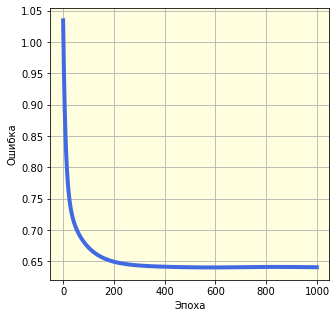

In [7]:
plt.figure(figsize=(5, 5))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")

plt.plot(list(range(len(total_err))), total_err, color='RoyalBlue', linewidth=3,
          markeredgewidth=2, markersize=10, markevery=5)                               
                                    
plt.xlabel('Эпоха')                    
plt.ylabel('Ошибка')  
plt.grid()                       

In [8]:
for id in range(10):
  input = np.reshape(x_test[id], (len(x_test[id]), 1))
  layer_1 = np.dot(weights_i_h, input) 
  output = np.dot(weights_h_o, layer_1)
  error = np.sum((np.reshape(y_test[id], (len(y_test[id]), 1)) - output) ** 2)
  print(f'OUT: {np.around(output.T, decimals=2)}, ERR: {np.around(error, decimals=2)}, GOAL: {y_test[id]}')

OUT: [[-0.03  0.33  0.27  0.5 ]], ERR: 0.43, GOAL: [0 0 0 1]
OUT: [[0.23 0.06 0.3  0.61]], ERR: 0.92, GOAL: [0 0 1 0]
OUT: [[0.06 0.18 0.23 0.51]], ERR: 0.33, GOAL: [0 0 0 1]
OUT: [[ 0.14 -0.01  0.14  0.26]], ERR: 0.58, GOAL: [0 0 0 1]
OUT: [[ 0.22 -0.04  0.2   0.41]], ERR: 0.82, GOAL: [1 0 0 0]
OUT: [[0.13 0.07 0.21 0.4 ]], ERR: 0.43, GOAL: [0 0 0 1]
OUT: [[0.15 0.02 0.19 0.34]], ERR: 0.5, GOAL: [0 0 0 1]
OUT: [[0.05 0.16 0.21 0.39]], ERR: 0.44, GOAL: [0 0 0 1]
OUT: [[ 0.43 -0.25  0.22  0.47]], ERR: 0.67, GOAL: [1 0 0 0]
OUT: [[0.14 0.15 0.29 0.56]], ERR: 0.87, GOAL: [0 0 1 0]


То же самое только с RELU

In [11]:
def relu(x):
  return (x > 0) * x

def relu2deriv(output):
  return output > 0

In [10]:
hidden_size = 10
weights_i_h = np.random.random(size=(hidden_size, len(x_train[0]))) - 0.5
weights_h_o = np.random.random(size=(len(y_test[0]), hidden_size)) - 0.5

In [11]:
alpha = 0.001
iterations = 1000
total_err = []
flag = True

for iteration in range(iterations):
  error = 0
  for id in range(len(x_train)):
    input = np.reshape(x_train[id], (len(x_train[id]), 1))
    layer_1 = relu(np.dot(weights_i_h, input)) 
    output = np.dot(weights_h_o, layer_1) 
    error += np.sum((np.reshape(y_train[id], (len(y_train[id]), 1)) - output) ** 2)
    delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
    delta_h = np.dot(weights_h_o.T, delta_out) * relu2deriv(layer_1)
    weights_h_o += alpha * np.dot(delta_out, layer_1.T)
    weights_i_h += alpha * np.dot(delta_h, input.T)

  total_err.append(error / len(x_train))
  if iteration % 100 == 0:
    print(f'ITER: {iteration}, ERR: {error / len(x_train)}')

ITER: 0, ERR: 0.9231891818836238
ITER: 100, ERR: 0.4775397514026792
ITER: 200, ERR: 0.4532109164067238
ITER: 300, ERR: 0.4401770247757386
ITER: 400, ERR: 0.4261211295703279
ITER: 500, ERR: 0.4098976039365787
ITER: 600, ERR: 0.395324148677108
ITER: 700, ERR: 0.387270642256397
ITER: 800, ERR: 0.38093137222663476
ITER: 900, ERR: 0.37618040122396906


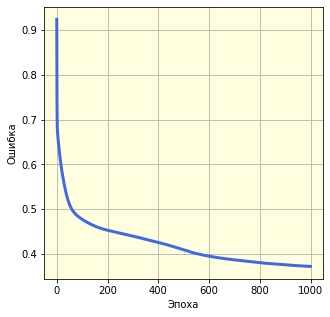

In [12]:
plt.figure(figsize=(5, 5))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")

plt.plot(list(range(len(total_err))), total_err, color='RoyalBlue', linewidth=3,
          markeredgewidth=2, markersize=10, markevery=5)                               
                                    
plt.xlabel('Эпоха')                  
plt.ylabel('Ошибка')  
plt.grid()                    

In [13]:
for id in range(10):
  input = np.reshape(x_test[id], (len(x_test[id]), 1))
  layer_1 = relu(np.dot(weights_i_h, input)) #relu
  output = np.dot(weights_h_o, layer_1) # softmax
  error = np.sum((np.reshape(y_test[id], (len(y_test[id]), 1)) - output) ** 2)
  print(f'OUT: {np.around(output.T, decimals=2)}, ERR: {np.around(error, decimals=2)}, GOAL: {y_test[id]}')

OUT: [[-0.04  0.1   0.29  0.63]], ERR: 0.23, GOAL: [0 0 0 1]
OUT: [[ 0.22 -0.12  0.47  0.4 ]], ERR: 0.5, GOAL: [0 0 1 0]
OUT: [[ 0.07 -0.09  0.14  1.15]], ERR: 0.06, GOAL: [0 0 0 1]
OUT: [[ 0.05 -0.1   0.12  0.51]], ERR: 0.27, GOAL: [0 0 0 1]
OUT: [[0.4  0.   0.25 0.05]], ERR: 0.42, GOAL: [1 0 0 0]
OUT: [[ 0.03 -0.09  0.19  0.69]], ERR: 0.14, GOAL: [0 0 0 1]
OUT: [[ 0.02 -0.09  0.14  0.89]], ERR: 0.04, GOAL: [0 0 0 1]
OUT: [[-0.03 -0.01  0.18  0.69]], ERR: 0.13, GOAL: [0 0 0 1]
OUT: [[ 0.88  0.14  0.1  -0.1 ]], ERR: 0.05, GOAL: [1 0 0 0]
OUT: [[ 0.19 -0.02  0.46  0.28]], ERR: 0.41, GOAL: [0 0 1 0]


То же самое только с RELU и SOFTMAX и очень маленьким коэффициентом обучения alpha.

In [12]:
def softmax(x):
  temp = np.exp(x)
  return temp / np.sum(temp, axis=1, keepdims=True)

In [15]:
np.random.seed(42)
hidden_size = 10
weights_i_h = np.random.random(size=(hidden_size, len(x_train[0]))) - 0.5
weights_h_o = np.random.random(size=(len(y_test[0]), hidden_size)) - 0.5

In [16]:
alpha = 0.0001
iterations = 1000
total_err = []
flag = True

for iteration in range(iterations):
  error = 0
  for id in range(len(x_train)):
    input = np.reshape(x_train[id], (len(x_train[id]), 1))
    layer_1 = relu(np.dot(weights_i_h, input)) #relu
    output = softmax(np.dot(weights_h_o, layer_1).T).T # softmax
    error += np.sum((np.reshape(y_train[id], (len(y_train[id]), 1)) - output) ** 2)
    delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
    delta_h = np.dot(weights_h_o.T, delta_out) * relu2deriv(layer_1)
    weights_h_o += alpha * np.dot(delta_out, layer_1.T)
    weights_i_h += alpha * np.dot(delta_h, input.T)

  total_err.append(error / len(x_train))
  if iteration % 100 == 0:
    print(f'ITER: {iteration}, ERR: {error / len(x_train)}')

ITER: 0, ERR: 0.764143065813552
ITER: 100, ERR: 0.6709305702653112
ITER: 200, ERR: 0.6572934808808225
ITER: 300, ERR: 0.6423078810488013
ITER: 400, ERR: 0.6197297414512379
ITER: 500, ERR: 0.5914504721150259
ITER: 600, ERR: 0.5640424996057919
ITER: 700, ERR: 0.5429139321318589
ITER: 800, ERR: 0.5291247512124709
ITER: 900, ERR: 0.520489104061495


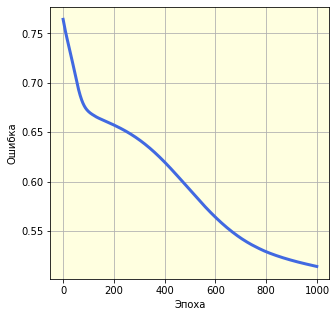

In [17]:
plt.figure(figsize=(5, 5))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")
plt.plot(list(range(len(total_err))), total_err, color='RoyalBlue', linewidth=3,
          markeredgewidth=2, markersize=10, markevery=5)                                                
plt.xlabel('Эпоха')                
plt.ylabel('Ошибка')  
plt.grid()                    

In [18]:
for id in range(10):
  input = np.reshape(x_test[id], (len(x_test[id]), 1))
  layer_1 = relu(np.dot(weights_i_h, input)) 
  output = softmax(np.dot(weights_h_o, layer_1).T).T 
  error = np.sum((np.reshape(y_test[id], (len(y_test[id]), 1)) - output) ** 2)
  print(f'OUT: {np.around(output.T, decimals=2)}, ERR: {np.around(error, decimals=2)}, GOAL: {y_test[id]}')

OUT: [[0.01 0.17 0.2  0.62]], ERR: 0.21, GOAL: [0 0 0 1]
OUT: [[0.1  0.01 0.35 0.54]], ERR: 0.72, GOAL: [0 0 1 0]
OUT: [[0.01 0.16 0.29 0.54]], ERR: 0.32, GOAL: [0 0 0 1]
OUT: [[0.18 0.02 0.21 0.59]], ERR: 0.25, GOAL: [0 0 0 1]
OUT: [[0.29 0.02 0.31 0.39]], ERR: 0.75, GOAL: [1 0 0 0]
OUT: [[0.07 0.02 0.21 0.7 ]], ERR: 0.14, GOAL: [0 0 0 1]
OUT: [[0.06 0.   0.11 0.83]], ERR: 0.04, GOAL: [0 0 0 1]
OUT: [[0.03 0.05 0.2  0.72]], ERR: 0.13, GOAL: [0 0 0 1]
OUT: [[0.77 0.   0.11 0.12]], ERR: 0.08, GOAL: [1 0 0 0]
OUT: [[0.06 0.04 0.35 0.54]], ERR: 0.72, GOAL: [0 0 1 0]


In [15]:
def get_weights(hidden_size=10):
  np.random.seed(40)
  weights_i_h = np.random.random(size=(hidden_size, len(x_train[0]))) - 0.5
  weights_h_o = np.random.random(size=(len(y_test[0]), hidden_size)) - 0.5
  return weights_i_h, weights_h_o

In [18]:
total_err_dict = {}
for hidden_size in range (1, 26, 3):
  weights_i_h, weights_h_o = get_weights(hidden_size)
  alpha = 0.025
  iterations = 500
  total_err = []

  for iteration in range(iterations):
    total_err_iter = []
    error = 0
    for id in range(len(x_train)):
      input = np.reshape(x_train[id], (len(x_train[id]), 1))
      layer_1 = relu(np.dot(weights_i_h, input))
      output = softmax(np.dot(weights_h_o, layer_1).T).T 
      error = np.sum((np.reshape(y_train[id], (len(y_train[id]), 1)) - output) ** 2)
      delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
      delta_h = np.dot(weights_h_o.T, delta_out) * relu2deriv(layer_1)
      weights_h_o += alpha * np.dot(delta_out, layer_1.T)
      weights_i_h += alpha * np.dot(delta_h, input.T)

      total_err_iter.append(error)

    if iteration % 100 == 0 or iteration == 0 or iteration == iterations-1:
      print(f'H_S: {hidden_size}, ITER: {iteration}, ERR: {np.array(total_err_iter).mean()}')
    total_err.append(np.array(total_err_iter).mean())
  total_err_dict[hidden_size] = total_err

H_S: 1, ITER: 0, ERR: 0.7481836364591918
H_S: 1, ITER: 100, ERR: 0.6851447613300738
H_S: 1, ITER: 200, ERR: 0.6849943971356952
H_S: 1, ITER: 300, ERR: 0.6850328269513577
H_S: 1, ITER: 400, ERR: 0.6849923581506379
H_S: 1, ITER: 499, ERR: 0.6851456727418804
H_S: 4, ITER: 0, ERR: 0.6821477674774294
H_S: 4, ITER: 100, ERR: 0.3633484097806279
H_S: 4, ITER: 200, ERR: 0.35698866876416574
H_S: 4, ITER: 300, ERR: 0.3500310890834111
H_S: 4, ITER: 400, ERR: 0.3486377914888078
H_S: 4, ITER: 499, ERR: 0.34827153318380316
H_S: 7, ITER: 0, ERR: 0.6897922504693506
H_S: 7, ITER: 100, ERR: 0.27910517040119665
H_S: 7, ITER: 200, ERR: 0.26724265923443846
H_S: 7, ITER: 300, ERR: 0.26058650455119386
H_S: 7, ITER: 400, ERR: 0.2564282842243183
H_S: 7, ITER: 499, ERR: 0.25371329230365225
H_S: 10, ITER: 0, ERR: 0.6778717805849578
H_S: 10, ITER: 100, ERR: 0.18353282766915047
H_S: 10, ITER: 200, ERR: 0.07174756681312315
H_S: 10, ITER: 300, ERR: 0.006535138637314217
H_S: 10, ITER: 400, ERR: 0.003289241752247799
H_

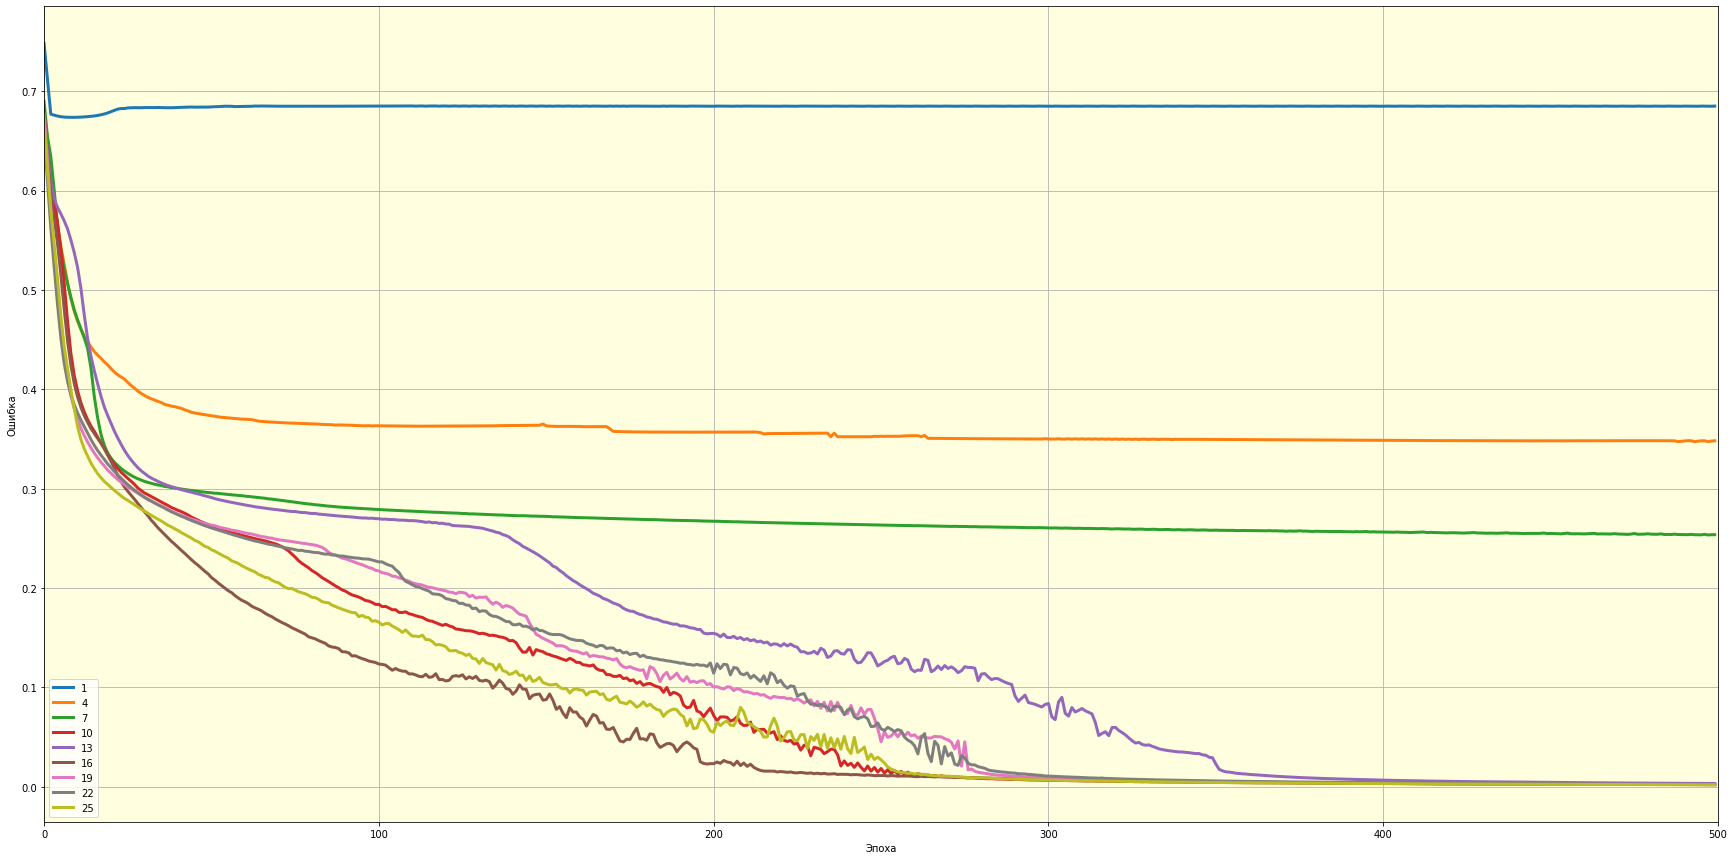

In [19]:
plt.figure(figsize=(30, 15))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")
for k, v in total_err_dict.items():
  plt.plot(list(range(len(v))), v, label=str(k), linewidth=3)
  plt.legend()

plt.xlabel('Эпоха')                    
plt.ylabel('Ошибка') 
plt.xlim(0, 500) 
plt.grid()   
plt.show()                 

In [21]:
total_err_dict = {}
for alpha in [0.5, 0.25, 0.1, 0.05, 0.25, 0.01, 0.005, 0.0025, 0.001]:
  weights_i_h, weights_h_o = get_weights(16)
  iterations = 500
  total_err = []

  for iteration in range(iterations):
    total_err_iter = []
    error = 0
    for id in range(len(x_train)):
      input = np.reshape(x_train[id], (len(x_train[id]), 1))
      layer_1 = relu(np.dot(weights_i_h, input))
      output = softmax(np.dot(weights_h_o, layer_1).T).T 
      error = np.sum((np.reshape(y_train[id], (len(y_train[id]), 1)) - output) ** 2)
      delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
      delta_h = np.dot(weights_h_o.T, delta_out) * relu2deriv(layer_1)
      weights_h_o += alpha * np.dot(delta_out, layer_1.T)
      weights_i_h += alpha * np.dot(delta_h, input.T)

      total_err_iter.append(error)

    if iteration % 100 == 0 or iteration == 0 or iteration == iterations-1:
      print(f'ALPHA: {alpha}, ITER: {iteration}, ERR: {np.array(total_err_iter).mean()}')
    total_err.append(np.array(total_err_iter).mean())
  total_err_dict[alpha] = total_err

ALPHA: 0.5, ITER: 0, ERR: 0.6573680924135986
ALPHA: 0.5, ITER: 100, ERR: 0.7090820934272717
ALPHA: 0.5, ITER: 200, ERR: 0.7357770646413792
ALPHA: 0.5, ITER: 300, ERR: 0.7141677677346736
ALPHA: 0.5, ITER: 400, ERR: 0.7487856035088278
ALPHA: 0.5, ITER: 499, ERR: 0.7373895997753278
ALPHA: 0.25, ITER: 0, ERR: 0.6161858870403889
ALPHA: 0.25, ITER: 100, ERR: 0.4749993505686399
ALPHA: 0.25, ITER: 200, ERR: 0.4579085969858729
ALPHA: 0.25, ITER: 300, ERR: 0.46219086192471215
ALPHA: 0.25, ITER: 400, ERR: 0.48389167396139837
ALPHA: 0.25, ITER: 499, ERR: 0.4632141324892458
ALPHA: 0.1, ITER: 0, ERR: 0.6477909765881877
ALPHA: 0.1, ITER: 100, ERR: 0.3605075924963237
ALPHA: 0.1, ITER: 200, ERR: 0.3685821463683447
ALPHA: 0.1, ITER: 300, ERR: 0.3878591286269143
ALPHA: 0.1, ITER: 400, ERR: 0.3456518944477615
ALPHA: 0.1, ITER: 499, ERR: 0.36597799970526357
ALPHA: 0.05, ITER: 0, ERR: 0.6647110567763066
ALPHA: 0.05, ITER: 100, ERR: 0.20588382727791676
ALPHA: 0.05, ITER: 200, ERR: 0.23080273337382523
ALPHA: 

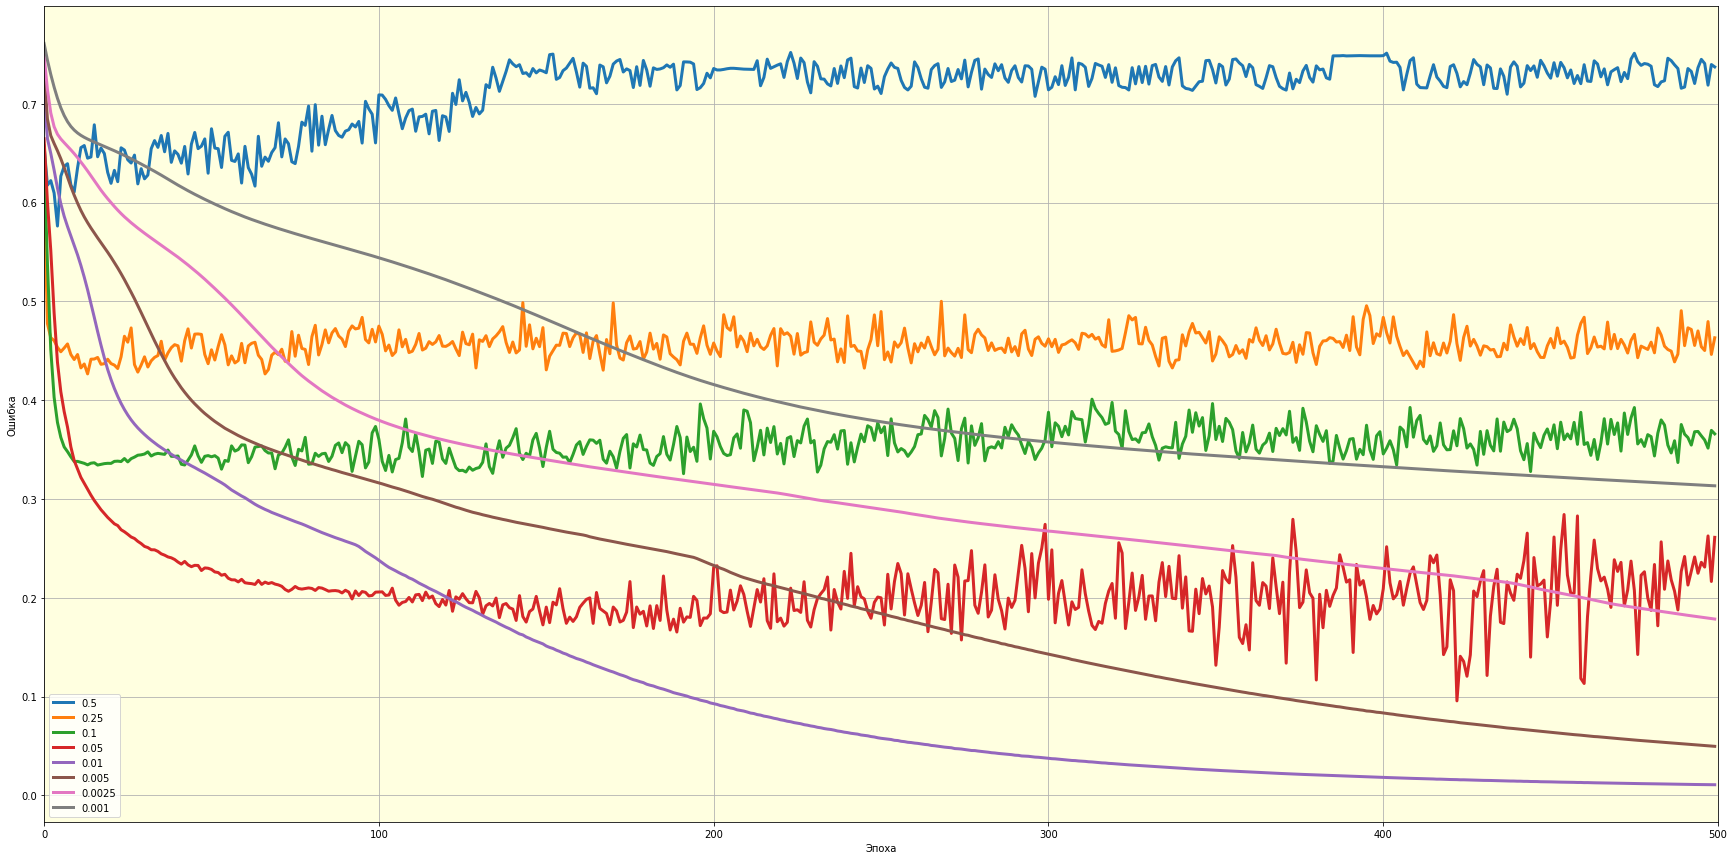

In [22]:
plt.figure(figsize=(30, 15))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")
for k, v in total_err_dict.items():
  plt.plot(list(range(len(v))), v, label=str(k), linewidth=3)
  plt.legend()

plt.xlabel('Эпоха')                    
plt.ylabel('Ошибка') 
plt.xlim(0, 500) 
plt.grid()   
plt.show() 